In [2]:
import numpy as np
import neuralnetworks as nn
import mlutils as ml
import scaledconjugategradient as scg
import matplotlib.pyplot as plt
import time as time
%matplotlib inline

<h3>trainNNs function</h3>

In [4]:
def trainNNs(X, T, trainFraction, hiddenLayerStructures, numberRepetitions, numberIterations, classify=False, verbose=False):
    results = []
    for network in hiddenLayerStructures:
        test = []
        train = []
        startTime = time.time()
        for n in range(numberRepetitions):
            Xtrain, Ttrain, Xtest, Ttest = ml.partition(X, T, (trainFraction, 1-trainFraction), classification=classify)
            if(not classify):
                nnet = nn.NeuralNetwork(X.shape[1], network, T.shape[1])
            else:              
                nnet = nn.NeuralNetworkClassifier(X.shape[1], network, len(np.unique(T)))
                
            nnet.train(Xtrain, Ttrain, nIterations=numberIterations, verbose=verbose)
            YTrain = nnet.use(Xtrain)
            Ytest = nnet.use(Xtest)           
            train.append(np.sqrt(np.mean((YTrain-Ttrain)**2)))
            test.append(np.sqrt(np.mean((Ytest-Ttest)**2)))
                
        results.append([network, train, test, time.time() - startTime])

    return results
X = np.arange(10).reshape((-1,1))
T = X + 1 + np.random.uniform(-1, 1, ((10,1)))
print(X)
print()
print(T)
print()
print(trainNNs(X, T, 0.8, [2, 10, [10, 10]], 10, 100, classify=False))

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]

[[1.75656686]
 [2.53717594]
 [2.12118359]
 [3.0752418 ]
 [5.87812405]
 [5.96656539]
 [6.80946076]
 [7.78399868]
 [8.20171229]
 [9.87896173]]

[[2, [0.22880192934299437, 0.11332640142154832, 0.1854567124875415, 0.2746598936844068, 0.19061723142656808, 0.5943103601113952, 0.10914598549491218, 0.46176102210181025, 0.11952975654474317, 0.4481818670462615], [1.0820922177965842, 1.0980296531788636, 1.1781687216778138, 0.7513638483050861, 0.5286730342709746, 0.5623955614304463, 1.2397149201480873, 0.7661638936963879, 1.2250063077033055, 1.2752742736108735], 0.18766331672668457], [10, [0.24837450065611574, 0.157156549245652, 0.11439903855844763, 0.18516380748910732, 0.08718714440062915, 0.20248663271688985, 0.1431695070702987, 0.057556180888239855, 0.1771760308207644, 0.13033277266993384], [0.4679383209489105, 1.4988611590975198, 0.4589737888377333, 1.2550252604002523, 1.0793966977847906, 0.9036337077206412, 0.6385740536034273, 0.659079201104

<h3>summarize function</h3>

In [5]:
def summarize(results):
    rst = []
    for network in results:
        subrst = []
        for i, v in enumerate(network):
            if (i == 0): subrst.append(v)
            elif (i == len(network)-1): subrst.append(v)
            else: subrst.append(np.average(v))
        rst.append(subrst)
    return rst
X = np.arange(10).reshape((-1,1))
T = X + 1 + np.random.uniform(-1, 1, ((10,1)))
results = trainNNs(X, T, 0.8, [2, 10, [10, 10]], 5, 100, classify=False)
print(results)
print()
print(summarize(results))

[[2, [0.49191056707688646, 0.21574728498797346, 0.48930002617349694, 0.4370399335507803, 0.5649953655540624], [1.9415398726092383, 1.912333076699565, 2.0262544076212707, 3.5077973552328134, 0.8027929525347608], 0.08859729766845703], [10, [0.2406467471380994, 0.4705769543399609, 0.4535443411544375, 0.15044641537985862, 0.40722756750083533], [1.6077087002858028, 0.7537106851342376, 1.0130417572699995, 1.7689842293426603, 1.0968334005254767], 0.08747649192810059], [[10, 10], [0.30056870414874354, 0.5216814571371651, 0.34434505351045297, 0.27534580789298324, 0.2962671800352385], [1.2331473447701058, 0.6918055347277291, 1.9820766397673146, 3.8198737330425603, 1.3037819414876546], 0.13317108154296875]]

[[2, 0.4397986354686399, 2.0381435329395297, 0.08859729766845703], [10, 0.34448840510263834, 1.2480557545116355, 0.08747649192810059], [[10, 10], 0.3476416405449167, 1.8061370387590727, 0.13317108154296875]]


<h3>bestNetwork function</h3>

In [6]:
def bestNetwork(summary):
    i, min = 0, summary[0][2]
    for ind, network in enumerate(summary):
        if(network[2] < min):
            i, min = ind, network[2]
    return summary[i]
    
X = np.arange(10).reshape((-1,1))
T = X + 1 + np.random.uniform(-1, 1, ((10,1)))
results = trainNNs(X, T, 0.8, [2, 10, [10, 10]], 5, 100, classify=False)
summary = summarize(results)
print(summary)
print()
print(bestNetwork(summary))

[[2, 0.2736950144765183, 0.896651504801814, 0.08475828170776367], [10, 0.1739677677291931, 1.157663197146924, 0.09191441535949707], [[10, 10], 0.20043457022798483, 0.7009814691522994, 0.12558984756469727]]

[[10, 10], 0.20043457022798483, 0.7009814691522994, 0.12558984756469727]


<h3>Energy Data</h3><br/>
The energy data is divided in to two X columns the Applications Energy and Lights Energy. The Application Energy are integers ranging from 0 to 1080, while the Lights Energy are integers ranging from 0 to 70. The Train data is 24 columns of numbers and form a very complex (large range and not uniform) data set. This is an interesting problem since we will be using the same dataset to train a neural network for two different X columns.

In [1]:
data = np.loadtxt("energydata_complete.csv", skiprows=1, delimiter=",", usecols=range(1,29))
data = data[:,:26]
data.shape
Xenergy = data[:,2:]
Tenergy = data[:,:2]
with open("energydata_complete.csv") as myfile:
    names = [next(myfile) for x in range(1)]
    names = names[0].split(",")[1:27]
    Xnames = names[2:]
    Tnames = names[:2]

hiddenLayers = [[1, 1], [1, 1, 1], [1, 1, 1, 1], [2, 2], [2, 2, 2], [2, 2, 2, 2], [3, 3], [3, 3, 3], [3, 3, 3, 3], [3, 1, 3]]
for network in hiddenLayers:
    nnet = nn.NeuralNetwork(Xenergy.shape[1], network, Tenergy.shape[1])
    nnet.train(Xenergy, Tenergy, nIterations=2000, verbose=True)
    plt.plot(nnet.getErrorTrace(), '-')
plt.legend((hiddenLayers), loc='upper left')

NameError: name 'np' is not defined

SCG: Iteration 150 ObjectiveF=0.41658 Scale=1.000e-15 Time=0.00040 s/iter
SCG: Iteration 300 ObjectiveF=0.41639 Scale=1.000e-15 Time=0.00040 s/iter
SCG: Iteration 450 ObjectiveF=0.41628 Scale=1.000e-15 Time=0.00040 s/iter
SCG: Iteration 600 ObjectiveF=0.41623 Scale=1.000e-15 Time=0.00040 s/iter
SCG: Iteration 750 ObjectiveF=0.41620 Scale=1.000e-15 Time=0.00040 s/iter
SCG: Iteration 900 ObjectiveF=0.41618 Scale=1.000e-15 Time=0.00040 s/iter
SCG: Iteration 1050 ObjectiveF=0.41618 Scale=1.000e-15 Time=0.00040 s/iter
SCG: Iteration 1200 ObjectiveF=0.41617 Scale=1.000e-15 Time=0.00040 s/iter
SCG: Iteration 1350 ObjectiveF=0.41617 Scale=1.000e-15 Time=0.00042 s/iter
SCG: Iteration 1500 ObjectiveF=0.41617 Scale=1.000e-15 Time=0.00040 s/iter
SCG: Iteration 150 ObjectiveF=0.41649 Scale=1.000e-15 Time=0.00042 s/iter
SCG: Iteration 300 ObjectiveF=0.41628 Scale=1.000e-15 Time=0.00059 s/iter
SCG: Iteration 450 ObjectiveF=0.41621 Scale=1.000e-15 Time=0.00041 s/iter
SCG: Iteration 600 ObjectiveF=0.41

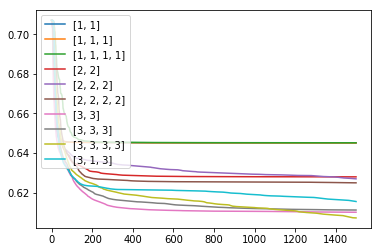

In [11]:
hiddenLayers = [[1, 1], [1, 1, 1], [1, 1, 1, 1], [2, 2], [2, 2, 2], [2, 2, 2, 2], [3, 3], [3, 3, 3], [3, 3, 3, 3], [3, 1, 3]]
for network in hiddenLayers:
    nnetApp = nn.NeuralNetwork(Xenergy.shape[1], network, 1)
    nnetApp.train(Xenergy, Tenergy[:,0], nIterations=2000, verbose=True)
    plt.plot(nnetApp.getErrorTrace(), '-')
plt.legend((hiddenLayers), loc='upper left')

SCG: Iteration 150 ObjectiveF=0.36252 Scale=1.000e-15 Time=0.00040 s/iter
SCG: Iteration 300 ObjectiveF=0.36248 Scale=1.000e-15 Time=0.00040 s/iter
SCG: Iteration 450 ObjectiveF=0.36246 Scale=1.000e-15 Time=0.00040 s/iter
SCG: Iteration 600 ObjectiveF=0.36245 Scale=1.000e-15 Time=0.00040 s/iter
SCG: Iteration 750 ObjectiveF=0.36244 Scale=1.000e-15 Time=0.00041 s/iter
SCG: Iteration 900 ObjectiveF=0.36244 Scale=1.000e-15 Time=0.00042 s/iter
SCG: Iteration 1050 ObjectiveF=0.36243 Scale=1.000e-15 Time=0.00040 s/iter
SCG: Iteration 1200 ObjectiveF=0.36243 Scale=1.000e-15 Time=0.00041 s/iter
SCG: Iteration 1350 ObjectiveF=0.36243 Scale=1.000e-15 Time=0.00041 s/iter
SCG: Iteration 1500 ObjectiveF=0.36243 Scale=1.000e-15 Time=0.00039 s/iter
SCG: Iteration 150 ObjectiveF=0.36248 Scale=1.000e-15 Time=0.00042 s/iter
SCG: Iteration 300 ObjectiveF=0.36246 Scale=1.000e-15 Time=0.00042 s/iter
SCG: Iteration 450 ObjectiveF=0.36246 Scale=1.000e-15 Time=0.00042 s/iter
SCG: Iteration 600 ObjectiveF=0.36

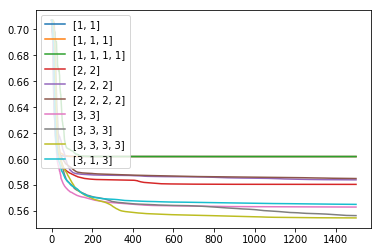

In [12]:
hiddenLayers = [[1, 1], [1, 1, 1], [1, 1, 1, 1], [2, 2], [2, 2, 2], [2, 2, 2, 2], [3, 3], [3, 3, 3], [3, 3, 3, 3], [3, 1, 3]]
for network in hiddenLayers:
    nnetLight = nn.NeuralNetwork(Xenergy.shape[1], network, 1)
    nnetLight.train(Xenergy, Tenergy[:,1], nIterations=2000, verbose=True)
    plt.plot(nnetLight.getErrorTrace(), '-')
plt.legend((hiddenLayers), loc='upper left')

<h3>Discussion Energy Error Plot</h3><br/>
Above are the error plots of the networks [[1, 1], [1, 1, 1], [1, 1, 1, 1], [2, 2], [2, 2, 2], [2, 2, 2, 2], [3, 3], [3, 3, 3], [3, 3, 3, 3], [3, 1, 3]]. I've plotted three error plots, the first one has 2 outputs and inputs both the Lights and Application Data, the second has one output and only plots the application data, and the third plot has only one output and only plots the lights data. I tried all three to see if there was any difference when there are two outputs for one plot compared to two plots with one output. The end result was that the error plots where all similar and the network [3, 3, 3, 3] ended up being the most accurate. When plotting the error for the energy data most of the lines become completely horizontal pretty early in the 100-300 iteration range. There are a couple which take longer and those are the more complex (larger number of nodes per layer and larger number of layers) networks like [3, 3, 3, 3] and [3, 3, 3]. [3, 3, 3, 3] looks like it levels out at about 2000. It seems like having layers each with one node wouldn't be a very effective network for this data. [1, 1, 1, 1] performs as well as the other two networks that have only 1 in each layer of the network [1, 1, 1] and [1, 1] which all preform at about 65% (on the first plot). [3, 3, 3, 3] on the other hand seems to be the most effective network and takes the longest time to even out because it has a long tail. This makes sense, since [3, 3, 3, 3] has the most nodes and the most layers and turns out to be the best network for the energy data on all three plots. Another odd feature of the graph is how the [3, 1, 3] network performs very poorly, in fact it only performs better then the networks with 1 node in each layer. So it seems any network with a layer of just 1 node performs poorly because of the bottleneck, while the more comlex layers perform better. The data is very complex and the fact that it takes so many iterations for the error traces to even out horizontally indicates a more complex network would perform better.

In [13]:
results = trainNNs(Xenergy, Tenergy, 0.8, hiddenLayers, 5, 2000, verbose=True)
print(bestNetwork(summarize(results)))
bestLayer = bestNetwork(summarize(results))

SCG: Iteration 200 ObjectiveF=0.42132 Scale=1.000e-15 Time=0.00051 s/iter
SCG: Iteration 400 ObjectiveF=0.42128 Scale=1.000e-15 Time=0.00050 s/iter
SCG: Iteration 600 ObjectiveF=0.42126 Scale=1.000e-15 Time=0.00050 s/iter
SCG: Iteration 800 ObjectiveF=0.42125 Scale=1.000e-15 Time=0.00051 s/iter
SCG: Iteration 1000 ObjectiveF=0.42125 Scale=1.000e-15 Time=0.00051 s/iter
SCG: Iteration 1200 ObjectiveF=0.42124 Scale=1.000e-15 Time=0.00051 s/iter
SCG: Iteration 1400 ObjectiveF=0.42124 Scale=1.000e-15 Time=0.00051 s/iter
SCG: Iteration 1600 ObjectiveF=0.42124 Scale=1.000e-15 Time=0.00052 s/iter
SCG: Iteration 1800 ObjectiveF=0.42123 Scale=1.000e-15 Time=0.00061 s/iter
SCG: Iteration 2000 ObjectiveF=0.42123 Scale=1.000e-15 Time=0.00050 s/iter
SCG: Iteration 200 ObjectiveF=0.42343 Scale=1.000e-15 Time=0.00037 s/iter
SCG: Iteration 400 ObjectiveF=0.42335 Scale=1.000e-15 Time=0.00033 s/iter
SCG: Iteration 600 ObjectiveF=0.42333 Scale=1.000e-15 Time=0.00033 s/iter
SCG: Iteration 800 ObjectiveF=0.

SCG: Iteration 200 ObjectiveF=0.42599 Scale=1.024e-12 Time=0.00005 s/iter
SCG: Iteration 400 ObjectiveF=0.42384 Scale=1.000e-15 Time=0.00058 s/iter
SCG: Iteration 600 ObjectiveF=0.42255 Scale=1.000e-15 Time=0.00056 s/iter
SCG: Iteration 800 ObjectiveF=0.42194 Scale=1.000e-15 Time=0.00056 s/iter
SCG: Iteration 1000 ObjectiveF=0.42175 Scale=1.000e-15 Time=0.00056 s/iter
SCG: Iteration 1200 ObjectiveF=0.42166 Scale=1.000e-15 Time=0.00056 s/iter
SCG: Iteration 1400 ObjectiveF=0.42162 Scale=1.000e-15 Time=0.00056 s/iter
SCG: Iteration 1600 ObjectiveF=0.42160 Scale=1.000e-15 Time=0.00056 s/iter
SCG: Iteration 1800 ObjectiveF=0.42159 Scale=1.000e-15 Time=0.00056 s/iter
SCG: Iteration 2000 ObjectiveF=0.42159 Scale=1.000e-15 Time=0.00056 s/iter
SCG: Iteration 200 ObjectiveF=0.42142 Scale=1.000e-15 Time=0.00056 s/iter
SCG: Iteration 400 ObjectiveF=0.42130 Scale=1.000e-15 Time=0.00059 s/iter
SCG: Iteration 600 ObjectiveF=0.42127 Scale=1.000e-15 Time=0.00056 s/iter
SCG: Iteration 800 ObjectiveF=0.

SCG: Iteration 200 ObjectiveF=0.38740 Scale=1.000e-15 Time=0.00069 s/iter
SCG: Iteration 400 ObjectiveF=0.38679 Scale=1.000e-15 Time=0.00067 s/iter
SCG: Iteration 600 ObjectiveF=0.38668 Scale=1.000e-15 Time=0.00066 s/iter
SCG: Iteration 800 ObjectiveF=0.38664 Scale=1.000e-15 Time=0.00066 s/iter
SCG: Iteration 1000 ObjectiveF=0.38660 Scale=1.000e-15 Time=0.00066 s/iter
SCG: Iteration 1200 ObjectiveF=0.38658 Scale=1.000e-15 Time=0.00068 s/iter
SCG: Iteration 1400 ObjectiveF=0.38655 Scale=1.000e-15 Time=0.00066 s/iter
SCG: Iteration 1600 ObjectiveF=0.38653 Scale=1.000e-15 Time=0.00091 s/iter
SCG: Iteration 1800 ObjectiveF=0.38652 Scale=1.000e-15 Time=0.00080 s/iter
SCG: Iteration 2000 ObjectiveF=0.38650 Scale=1.000e-15 Time=0.00102 s/iter
SCG: Iteration 200 ObjectiveF=0.40422 Scale=1.000e-15 Time=0.00157 s/iter
SCG: Iteration 400 ObjectiveF=0.39907 Scale=1.000e-15 Time=0.00068 s/iter
SCG: Iteration 600 ObjectiveF=0.39846 Scale=1.000e-15 Time=0.00089 s/iter
SCG: Iteration 800 ObjectiveF=0.

SCG: Iteration 200 ObjectiveF=0.37315 Scale=1.000e-15 Time=0.00065 s/iter
SCG: Iteration 400 ObjectiveF=0.37055 Scale=1.000e-15 Time=0.00063 s/iter
SCG: Iteration 600 ObjectiveF=0.37029 Scale=1.000e-15 Time=0.00094 s/iter
SCG: Iteration 800 ObjectiveF=0.37024 Scale=1.000e-15 Time=0.00063 s/iter
SCG: Iteration 1000 ObjectiveF=0.37022 Scale=1.000e-15 Time=0.00068 s/iter
SCG: Iteration 1200 ObjectiveF=0.37021 Scale=1.000e-15 Time=0.00063 s/iter
SCG: Iteration 1400 ObjectiveF=0.37019 Scale=1.000e-15 Time=0.00063 s/iter
SCG: Iteration 1600 ObjectiveF=0.37018 Scale=1.000e-15 Time=0.00063 s/iter
SCG: Iteration 1800 ObjectiveF=0.37018 Scale=1.000e-15 Time=0.00064 s/iter
SCG: Iteration 2000 ObjectiveF=0.37017 Scale=1.000e-15 Time=0.00063 s/iter
SCG: Iteration 200 ObjectiveF=0.38458 Scale=1.000e-15 Time=0.00064 s/iter
SCG: Iteration 400 ObjectiveF=0.38159 Scale=1.000e-15 Time=0.00064 s/iter
SCG: Iteration 600 ObjectiveF=0.37936 Scale=1.000e-15 Time=0.00064 s/iter
SCG: Iteration 800 ObjectiveF=0.

SCG: Iteration 200 ObjectiveF=0.37552 Scale=1.000e-15 Time=0.00078 s/iter
SCG: Iteration 400 ObjectiveF=0.37278 Scale=1.000e-15 Time=0.00077 s/iter
SCG: Iteration 600 ObjectiveF=0.37055 Scale=1.000e-15 Time=0.00094 s/iter
SCG: Iteration 800 ObjectiveF=0.37004 Scale=1.000e-15 Time=0.00078 s/iter
SCG: Iteration 1000 ObjectiveF=0.36954 Scale=1.000e-15 Time=0.00079 s/iter
SCG: Iteration 1200 ObjectiveF=0.36922 Scale=1.000e-15 Time=0.00078 s/iter
SCG: Iteration 1400 ObjectiveF=0.36909 Scale=1.000e-15 Time=0.00078 s/iter
SCG: Iteration 1600 ObjectiveF=0.36902 Scale=1.000e-15 Time=0.00082 s/iter
SCG: Iteration 1800 ObjectiveF=0.36895 Scale=1.000e-15 Time=0.00077 s/iter
SCG: Iteration 2000 ObjectiveF=0.36888 Scale=1.000e-15 Time=0.00077 s/iter
SCG: Iteration 200 ObjectiveF=0.40437 Scale=1.000e-15 Time=0.00070 s/iter
SCG: Iteration 400 ObjectiveF=0.39743 Scale=1.000e-15 Time=0.00067 s/iter
SCG: Iteration 600 ObjectiveF=0.39677 Scale=1.000e-15 Time=0.00091 s/iter
SCG: Iteration 800 ObjectiveF=0.

<h3>Application Energy</h3>

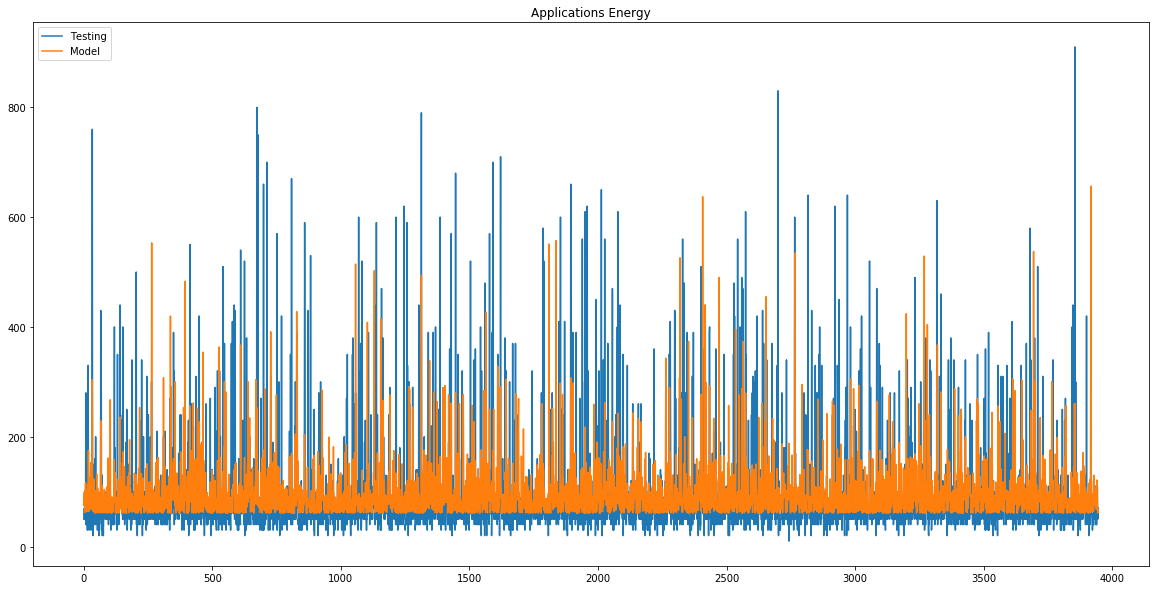

In [23]:
Xtrain, Ttrain, Xtest, Ttest = ml.partition(Xenergy, Tenergy[:,0].reshape(19735,1), (0.8, 0.2), classification=False)

nnet1 = nn.NeuralNetwork(Xenergy.shape[1], [3, 3, 3, 3], 1) 
nnet1.train(Xtrain, Ttrain, nIterations=2000)
Ytest = nnet1.use(Xtest)

plt.figure(figsize=(20,10))
plt.plot(Ttest)
plt.plot(Ytest)
plt.title("Applications Energy")
plt.legend(('Testing','Model'), loc='upper left')

<h3>Discussion Application Energy Plot</h3><br/>
When plotting the application energy data you get almost 4000 data point that range from 0 to about 1080 (depending on the data partitioned), so it is a really difficult dataset to model exactly. The model does a good job of not going outside of the max (1080) and min (0). If you look at the Testing and Model data it does seem that when there are a lot of Testing data point in the higher ranges the Model mimicks the Testing data and also increases to the higher ranges. Its hard to visualize the data here because of its size but the Model data does look similar to the Testing data in shape, range, and number of outliers.

<h3>Lights Energy</h3>

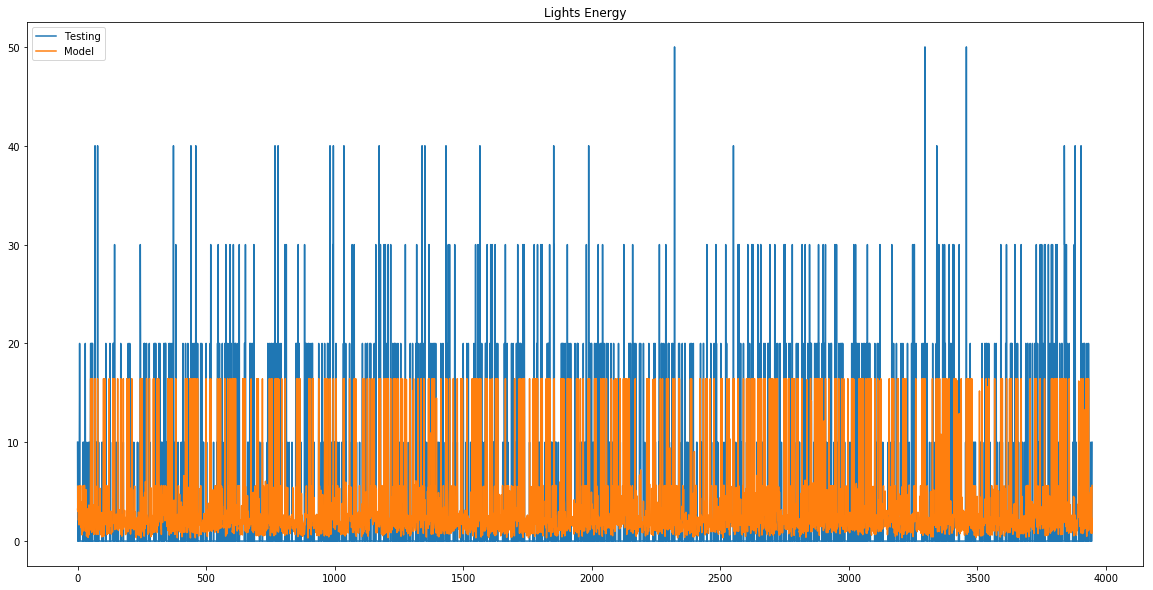

In [11]:
Xtrain, Ttrain, Xtest, Ttest = ml.partition(Xenergy, Tenergy[:,1].reshape(19735,1), (0.8, 0.2), classification=False)

nnet2 = nn.NeuralNetwork(Xenergy.shape[1], bestLayer[0], 1) 
nnet2.train(Xtrain, Ttrain, nIterations=2000)
Ytest = nnet2.use(Xtest)

plt.figure(figsize=(20,10))
plt.plot(Ttest)
plt.plot(Ytest)
plt.title("Lights Energy")
plt.legend(('Testing','Model'), loc='upper left')

<h3>Discussion Lights Energy Plot</h3><br/>
The Lights energy plot is similar to the Applications energy plot as it stays within the range (0 to 70). The light energy is a little easier to model because the X data is just multiples of 10. The test data does look a little more correlated to the model data and I think that's because the X data is simpler (less variety, more uniform values). Again there are areas that seem to have more upper outliers and the model does seem to follow that pattern slightly. Almost 4000 data points is a lot so having a model that can mirror those values exactly would be really difficult.

<h3>Frog Data</h3>

672 samples in class 0
3478 samples in class 1
542 samples in class 2
310 samples in class 3
472 samples in class 4
1121 samples in class 5
270 samples in class 6
114 samples in class 7
68 samples in class 8
148 samples in class 9
[[3, 3], 1.8046614793498807, 1.808092798013527, 3.087162733078003]


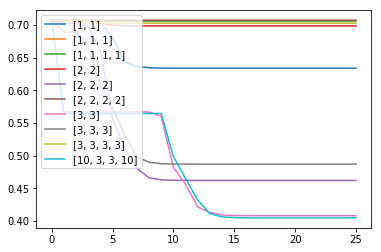

In [18]:
data = np.loadtxt("Frogs_MFCCs.csv", skiprows=1, delimiter=",", usecols=range(1,22))
data 
data.shape
Xanuran = data[:,:21]
Tanuran = []
Xanuran[:2,:]
import csv
with open("Frogs_MFCCs.csv", 'r') as f:
    rows = list(csv.reader(f, delimiter=';'))
    species = []
    for x in (rows[1:]):
        species.append(x[0].split(',')[24])
    u, indices = np.unique(species, return_index=True)
    index = {}
    for count, z in enumerate(u):
        index[z] = count
        
    for y in species:
        Tanuran.append((index[y],),)
        
        
Tanuran = np.array(Tanuran)
  
for i in range(10):
    print('{} samples in class {}'.format(np.sum(Tanuran==i), i))
    
hiddenLayers = [[1, 1], [1, 1, 1], [1, 1, 1, 1], [2, 2], [2, 2, 2], [2, 2, 2, 2], [3, 3], [3, 3, 3], [3, 3, 3, 3], [10, 3, 3, 10]]

for network in hiddenLayers:
    nnet3 = nn.NeuralNetwork(Xanuran.shape[1], network, len(np.unique(Tanuran)))
    nnet3.train(Xanuran, Tanuran, nIterations=25)
    plt.plot(nnet3.getErrorTrace(), '-')
plt.legend((hiddenLayers), loc='upper left')

results = trainNNs(Xanuran, Tanuran, 0.8, hiddenLayers, 10, 25, classify=True)
print(bestNetwork(summarize(results)))
bestLayer = bestNetwork(summarize(results))

<h3>Discussion Frog Error Plot</h3><br/>
The error plot for the Frog data levels off much earlier (around 10) then the Energy data probably because the X data is much simpler and is classified into 10 different values. However if you run the error plot several times you can get different performances from the networks. Running through several iterations in trainNNs to find the best square root solves this problem and the best network seems to be [3, 3]. Not only are the X values simpler the Testing data seems simpler as the values range from -1 to 1 which might explain why the error plot takes much less iterations to level out horizontally then the energy error plot. The simpler networks with layers that only have one node are again not very effective (around .70 error) The more complex networks perform better, but the [3, 3] network performs the best. The reason behind this might be that the more complex networks like [3, 3, 3, 3] and [10, 3, 3, 10] are too complex for this data and overcompensate when modeling it. While [3, 3] has the right level of complexity.

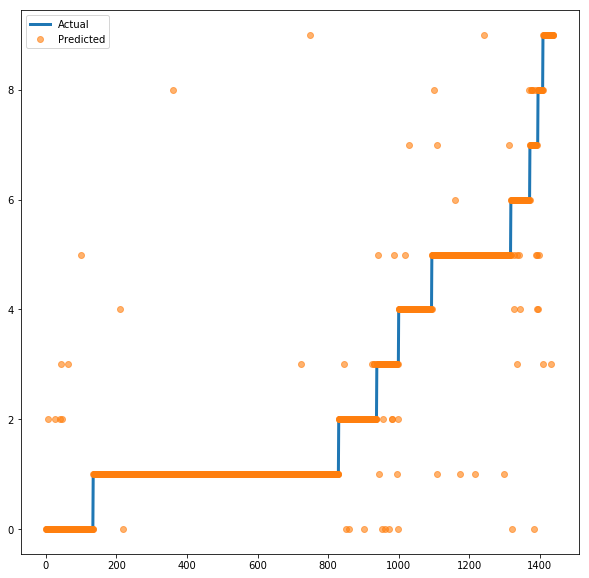

In [125]:
Xtrain, Ttrain, Xtest, Ttest = ml.partition(Xanuran, Tanuran, (0.8, 0.2), classification=True)

nnet2 = nn.NeuralNetworkClassifier(Xanuran.shape[1], bestLayer[0], 10) 
nnet2.train(Xtrain, Ttrain, nIterations=20)
Ytest = nnet2.use(Xtest)

plt.figure(figsize=(10,10))
plt.plot(Ttest,lw=3)
plt.plot(Ytest,'o',alpha=0.6)
plt.legend(('Actual','Predicted'),loc='best');

<h3>Discussion Frog Plot</h3><br/>
This graph does a great job of displaying the classified data and as you can see the model is very accurate when predicting the class of the test data. There are a few outliers for each class (0 through 9) but for the most part it accuratly classifies the test data. I think the classification problem is much easier to solve then the non-classified regression problem because of the lower variety of X data. The frog data has less data points then the energy data which made comparing the test and model data easier, but on the other hand there was less data to train on. The fact that the best network for the frog data was [3, 3] and the best network for the energy data [3, 3, 3, 3] shows how a neural network doesn't have to be really complex to accuratly model data with thousands of data points.

In [145]:
%run -i "A5grader.py"


======================= Code Execution =======================


Testing summarize([[[1,1], [1.2, 1.3, 1.4], [2.2, 2.3, 2.4], 0.5], [[2,2,2], [4.4, 4.3, 4.2], [6.5, 6.4, 6.3], 0.6]])

--- 10/10 points. Correctly returned [[[1, 1], 1.3, 2.3000000000000003, 0.5], [[2, 2, 2], 4.3, 6.3999999999999995, 0.6]]

Testing bestNetwork([[[1, 1], 1.3, 2.3, 0.5], [[2, 2, 2], 4.3, 1.3, 0.6]])

--- 10/10 points. Correctly returned [[2, 2, 2], 4.3, 1.3, 0.6]

X = np.random.uniform(-1, 1, (100, 3))
T = np.hstack(((X**2 - 0.2*X**3).sum(axis=1,keepdims=True),
               (np.sin(X)).sum(axis=1,keepdims=True)))
result = trainNNs(X, T, 0.7, [0, 5, 10, [20, 20]], 10, 100, False)

--- 20/20 points. Correct.

Testing bestNetwork(summarize(result))

--- 20/20 points. You correctly found that network [20, 20] is best.

C:\Users\Sam\cs440 Execution Grade is 60 / 60

======================= The regression data set =======================

--- _ / 5 points. Read the data in energydata_complete.csv into variable

<Figure size 432x288 with 0 Axes>